In [1]:
from google.colab import files
uploaded = files.upload()

Saving seeds_dataset.txt to seeds_dataset.txt


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, Normalizer, MinMaxScaler
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [9]:
column_names = ["area A",
"perimeter P",
"compactness C",
"length of kernel",
"width of kernel",
"asymmetry coefficient",
"length of kernel groove",
"seed-type"]

data = pd.read_csv("seeds_dataset.txt", names = column_names,delim_whitespace=True)

In [10]:
data.head()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,seed-type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area A                   210 non-null    float64
 1   perimeter P              210 non-null    float64
 2   compactness C            210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   seed-type                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [12]:
X = data.iloc[:,:7]

In [14]:
X.head()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area A                   210 non-null    float64
 1   perimeter P              210 non-null    float64
 2   compactness C            210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [16]:
X.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [17]:
y = data['seed-type']

In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: seed-type, dtype: int64

In [19]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 210 entries, 0 to 209
Series name: seed-type
Non-Null Count  Dtype
--------------  -----
210 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


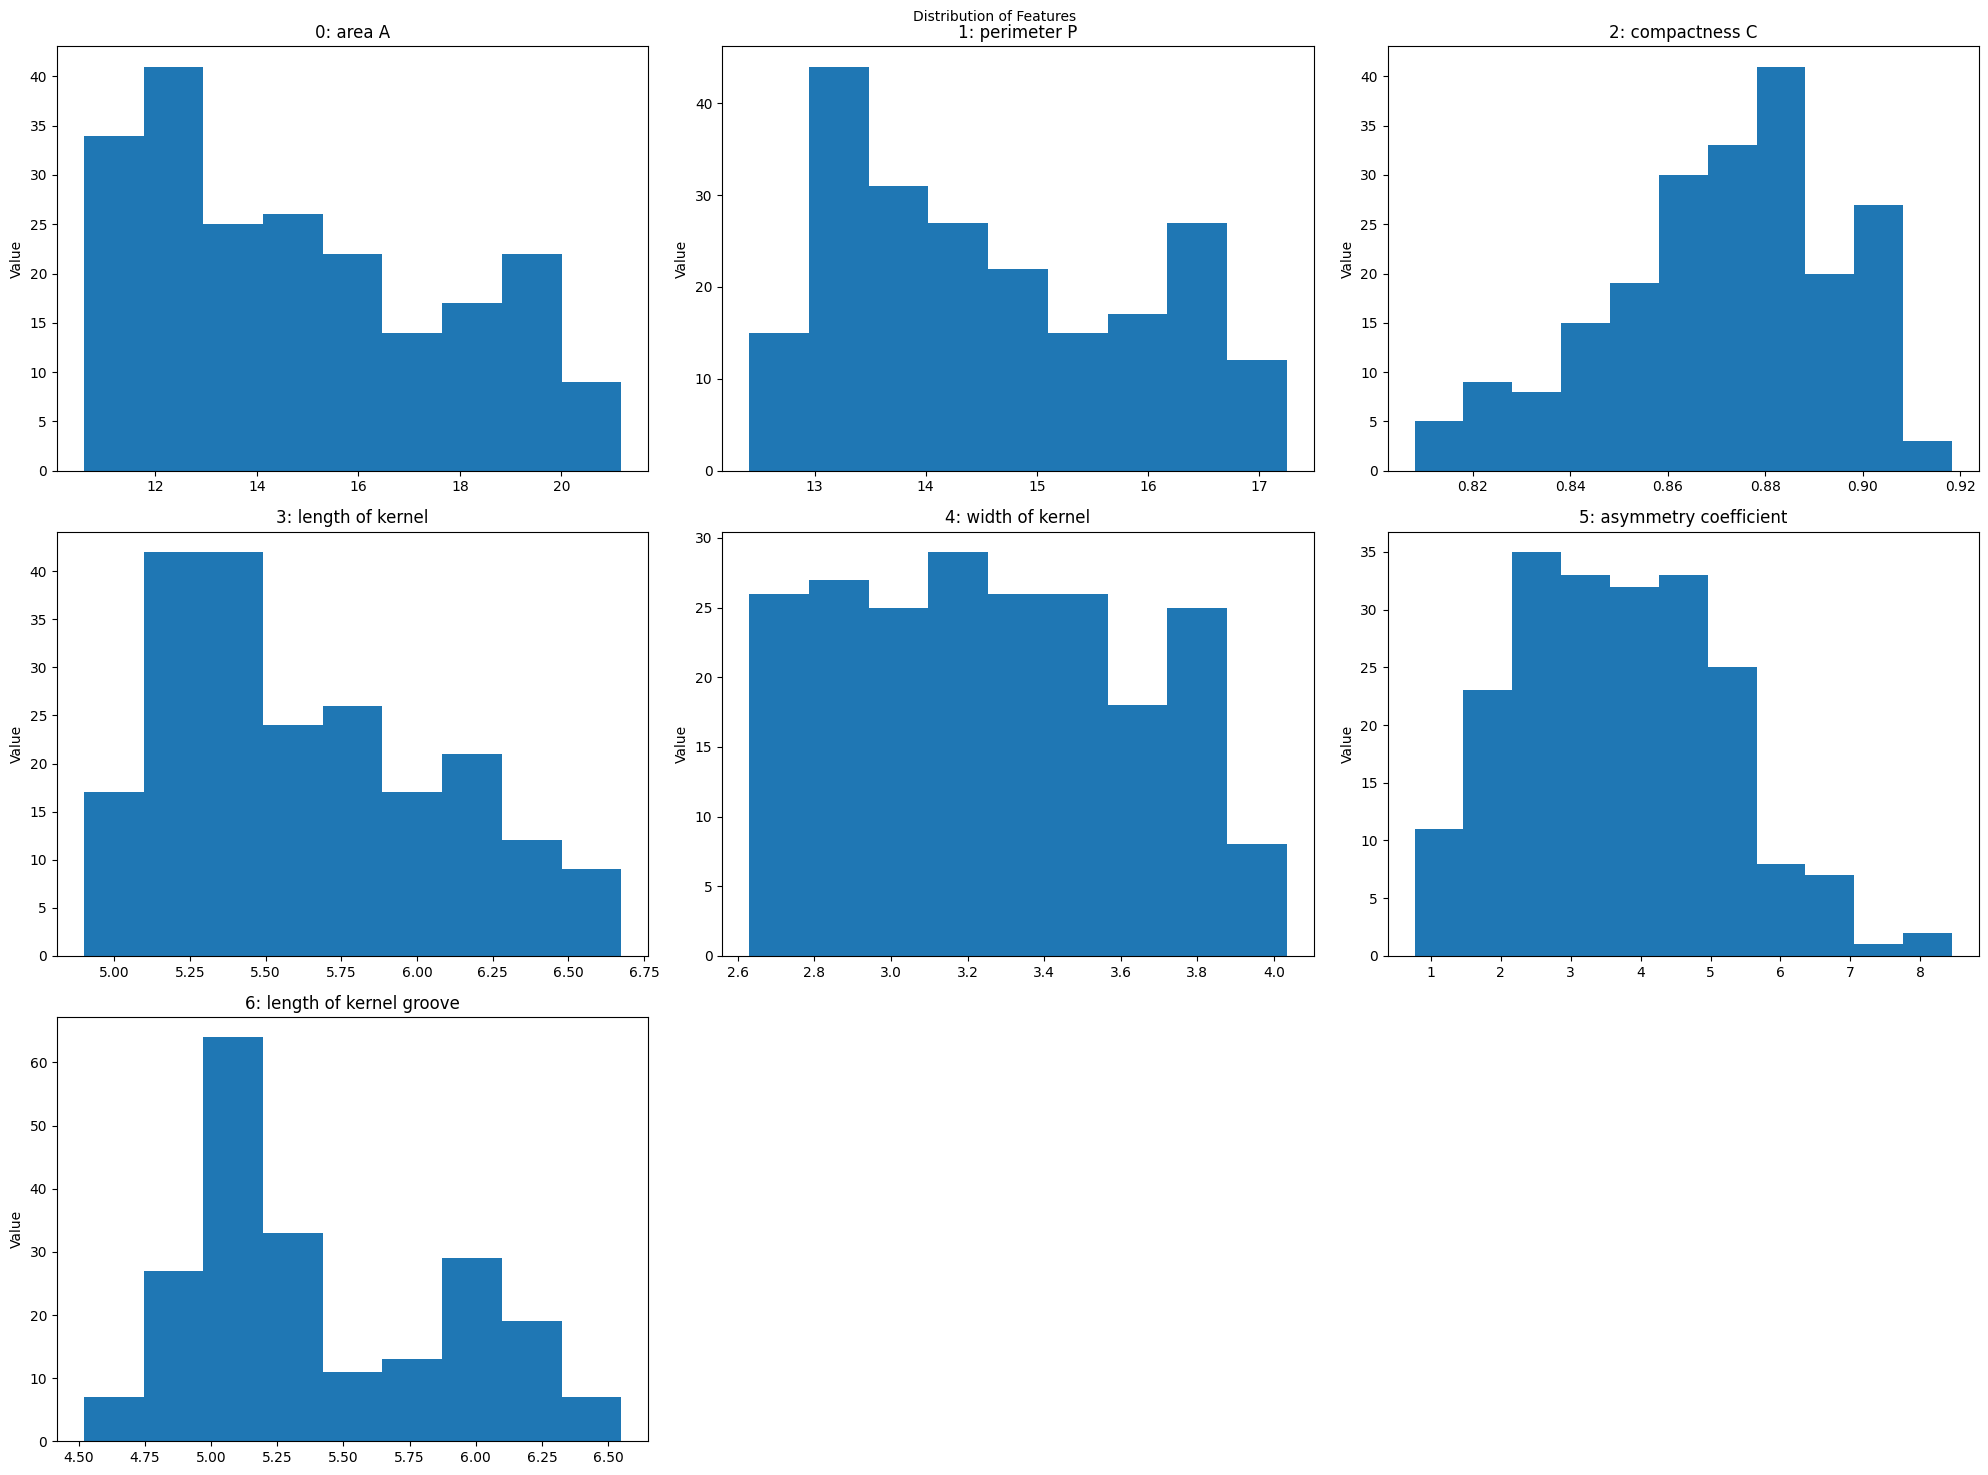

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
for i, ax in enumerate(axes.ravel()):
    if i == 7:
      break
    ax.hist(X.iloc[:,i],bins="auto")
    ax.set_title("{}: {}".format(i,column_names[i] ))
    ax.set_ylabel("Value")
fig.suptitle("Distribution of Features", fontsize=10)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pearson Correlation Coefficients')

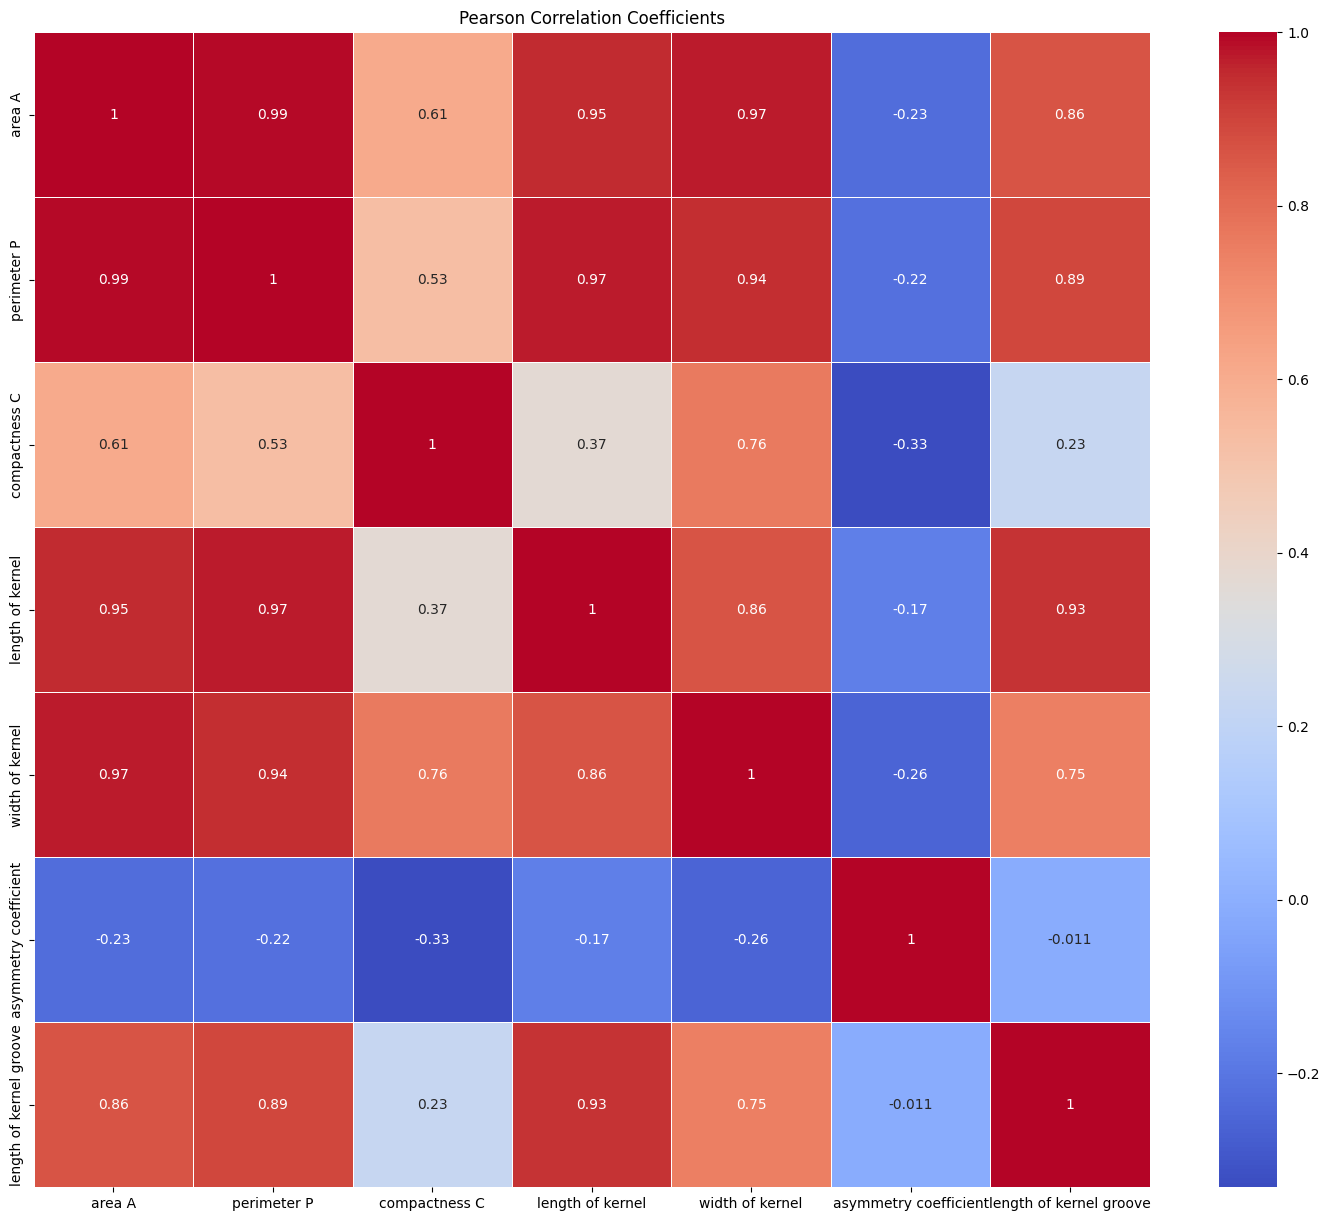

In [26]:
correlation_matrix = X.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')

Text(0.5, 1.0, 'Pearson Correlation Coefficients')

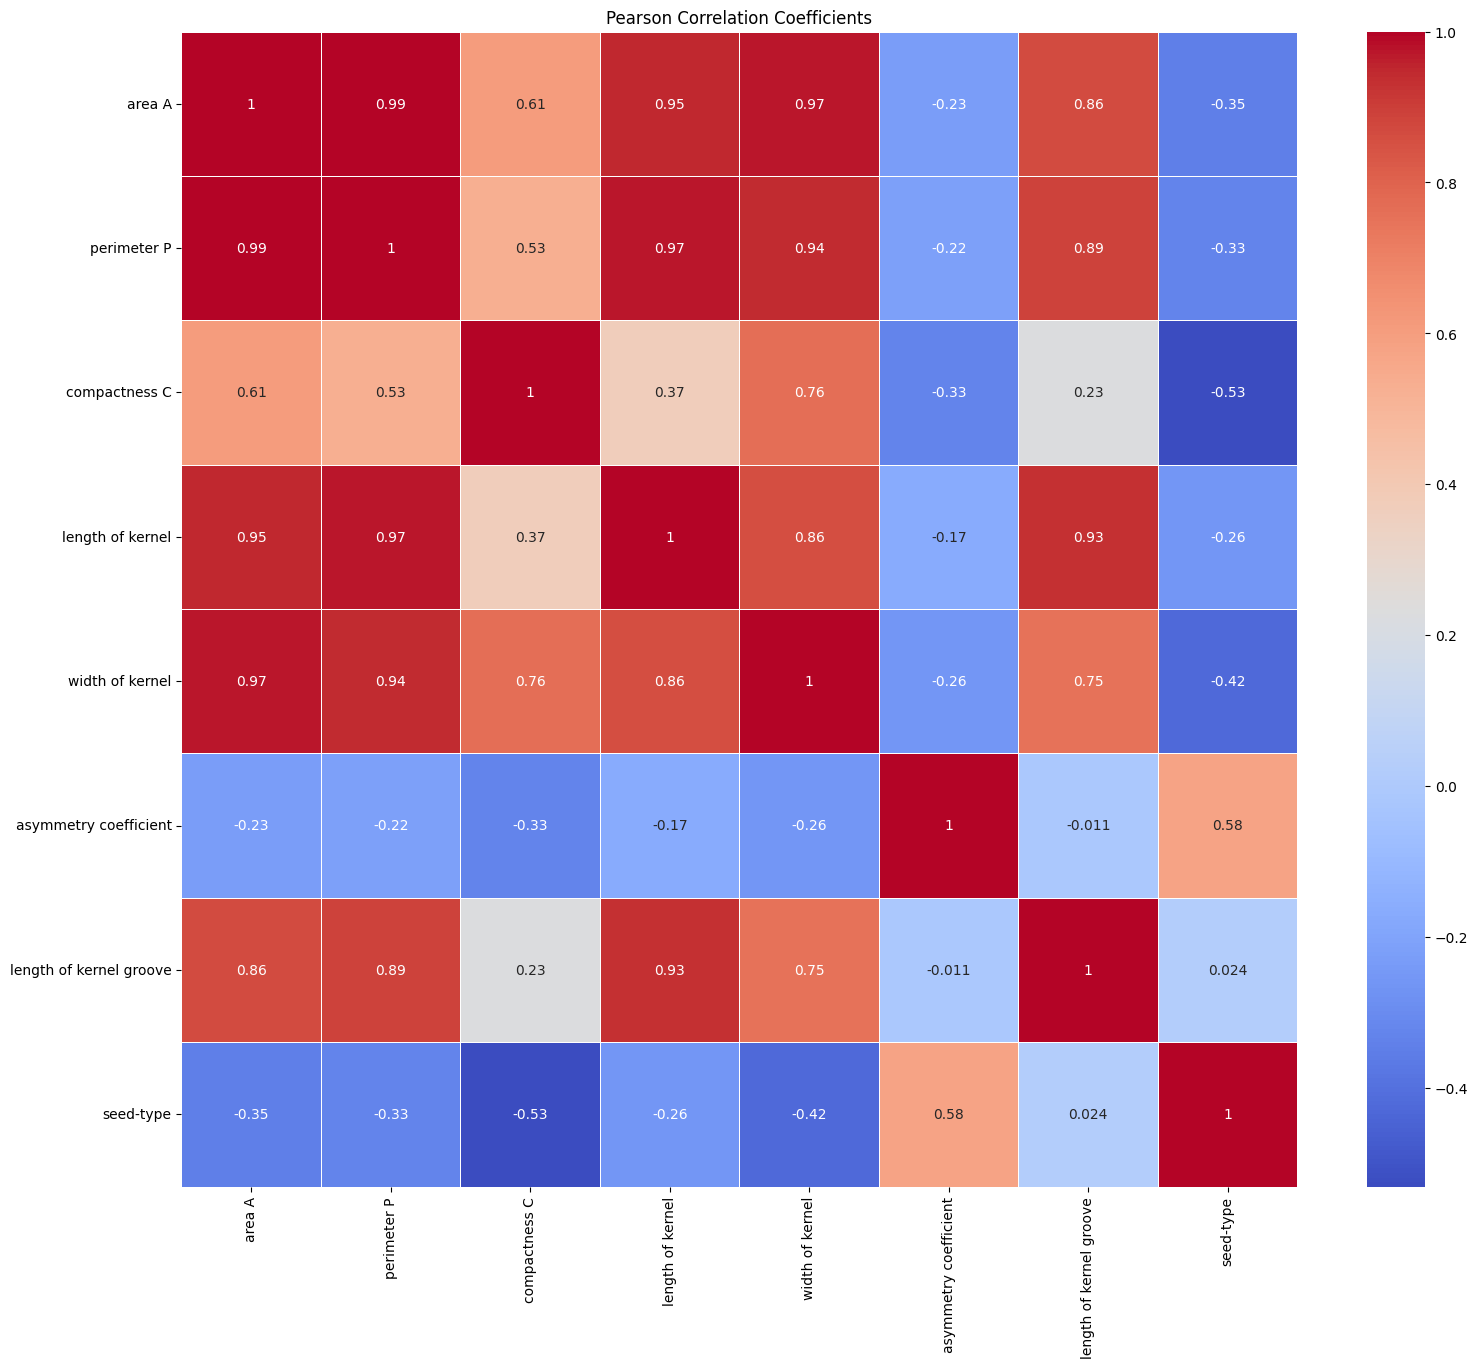

In [27]:
correlation_matrix = data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')

In [28]:
categ= X.dtypes == object
ind_features = list(X.columns)
ind_features

['area A',
 'perimeter P',
 'compactness C',
 'length of kernel',
 'width of kernel',
 'asymmetry coefficient',
 'length of kernel groove']

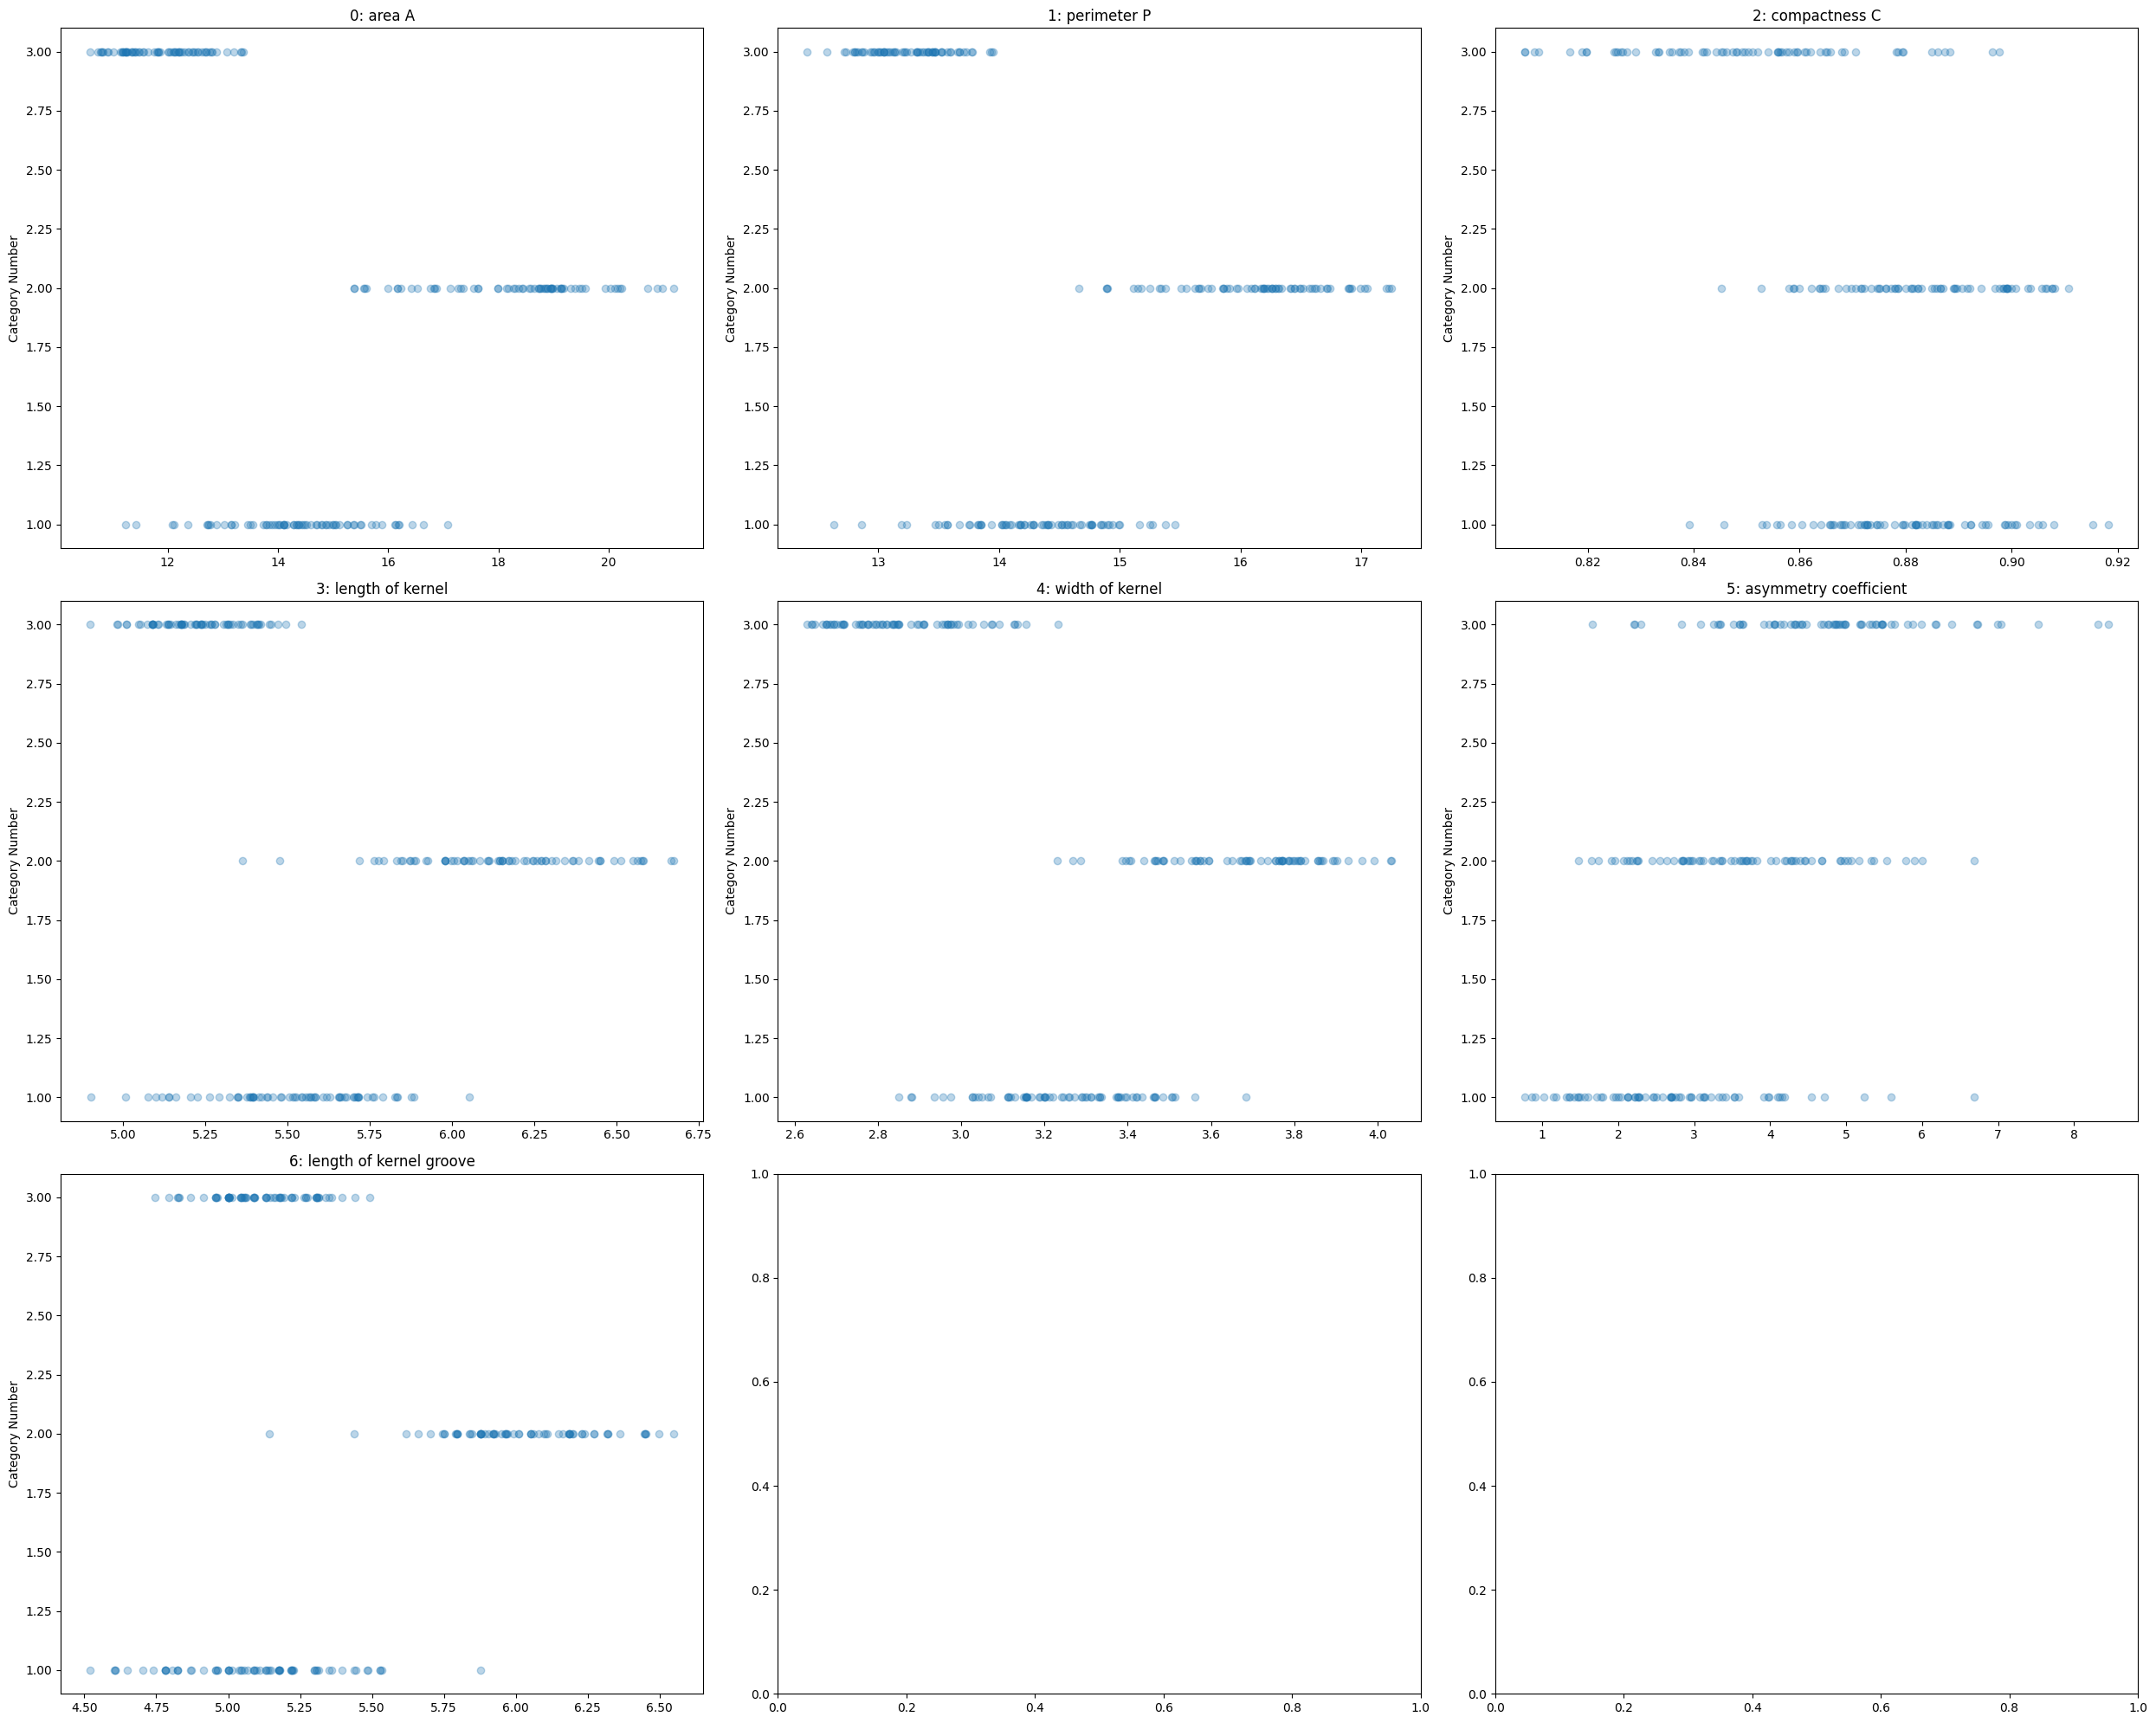

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(25, 20))
for i, ax in enumerate(axes.ravel()):
    if i ==7:
      break
    ax.plot(X.iloc[:,i], y, 'o', alpha=.3)
    ax.set_title("{}: {}".format(i, column_names[i]))
    ax.set_ylabel("Category Number")
plt.tight_layout()
plt.show()

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
X_train.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,14.841667,14.570635,0.868726,5.641698,3.254476,3.726564,5.424175
std,2.986032,1.327810,0.024952,0.437848,0.393688,1.488117,0.479743
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.222500,13.470000,0.853125,5.317500,2.900500,2.652000,5.063000
50%,14.380000,14.405000,0.871950,5.549500,3.250000,3.684500,5.270000
75%,17.477500,15.715000,0.886775,5.979750,3.562750,4.768750,5.877000
max,21.180000,17.250000,0.910800,6.666000,4.033000,7.524000,6.498000


In [34]:
X_valid.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,15.393810,14.784762,0.875948,5.676524,3.333333,3.425381,5.447571
std,3.002961,1.371204,0.021755,0.494662,0.371582,1.608221,0.543797
min,11.020000,12.870000,0.818900,5.053000,2.701000,0.903000,4.649000
25%,12.715000,13.410000,0.864050,5.209750,3.107000,2.163250,5.013250
50%,15.020000,14.765000,0.880450,5.652000,3.390000,3.168000,5.169500
75%,18.410000,16.112500,0.889300,6.132000,3.651000,4.286000,5.955750
max,20.200000,17.030000,0.915300,6.675000,3.930000,8.456000,6.550000


In [35]:
X_test.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14.318810,14.299762,0.872867,5.541048,3.196262,3.895931,5.320262
std,2.522635,1.147658,0.020741,0.400963,0.326957,1.437827,0.472902
min,10.910000,12.800000,0.825300,5.008000,2.668000,0.855100,4.607000
25%,12.407500,13.445000,0.862800,5.228500,2.969000,2.921500,5.039750
50%,13.410000,13.890000,0.873800,5.425500,3.140500,3.635000,5.145000
75%,15.962500,14.985000,0.884975,5.826750,3.470250,4.810250,5.670250
max,18.950000,16.490000,0.918300,6.445000,3.860000,8.315000,6.362000


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [37]:
def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    print(classification_report(y_pred, y))

In [38]:
param_grid_log = {
    'C': [ 0.05, 0.07, 0.1, 0.5, 1],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [50, 100,200, 500]
}

In [89]:
logistic_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)


grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid_log, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

evaluate_model(best_model, X_valid, y_valid)
evaluate_model(best_model, X_test, y_test)


{'C': 0.05, 'max_iter': 50, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.94      0.94      0.94        17
           3       0.92      1.00      0.96        11

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

              precision    recall  f1-score   support

           1       0.73      0.85      0.79        13
           2       0.92      1.00      0.96        11
           3       0.93      0.78      0.85        18

    accuracy                           0.86        42
   macro avg       0.86      0.87      0.86        42
weighted avg       0.87      0.86      0.86        42



In [40]:
from sklearn.svm import SVC
from  sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1,3, 5,10],
    'kernel': ['linear', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [86]:
svm_classifier = SVC()


grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

evaluate_model(best_model, X_valid, y_valid)
evaluate_model(best_model, X_test, y_test)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.94      1.00      0.97        16
           3       0.92      1.00      0.96        11

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.92      1.00      0.96        11
           3       0.93      0.82      0.87        17

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.89        42
weighted avg       0.88      0.88      0.88        42



In [82]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [84]:
random_forest_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid_rf, cv=6, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

evaluate_model(best_model, X_valid, y_valid)
evaluate_model(best_model, X_test, y_test)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.94      0.94      0.94        17
           3       0.92      1.00      0.96        11

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        15

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [44]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

length of kernel groove    0.210409
perimeter P                0.202419
area A                     0.176145
width of kernel            0.161735
length of kernel           0.133085
asymmetry coefficient      0.063816
compactness C              0.052391
dtype: float64

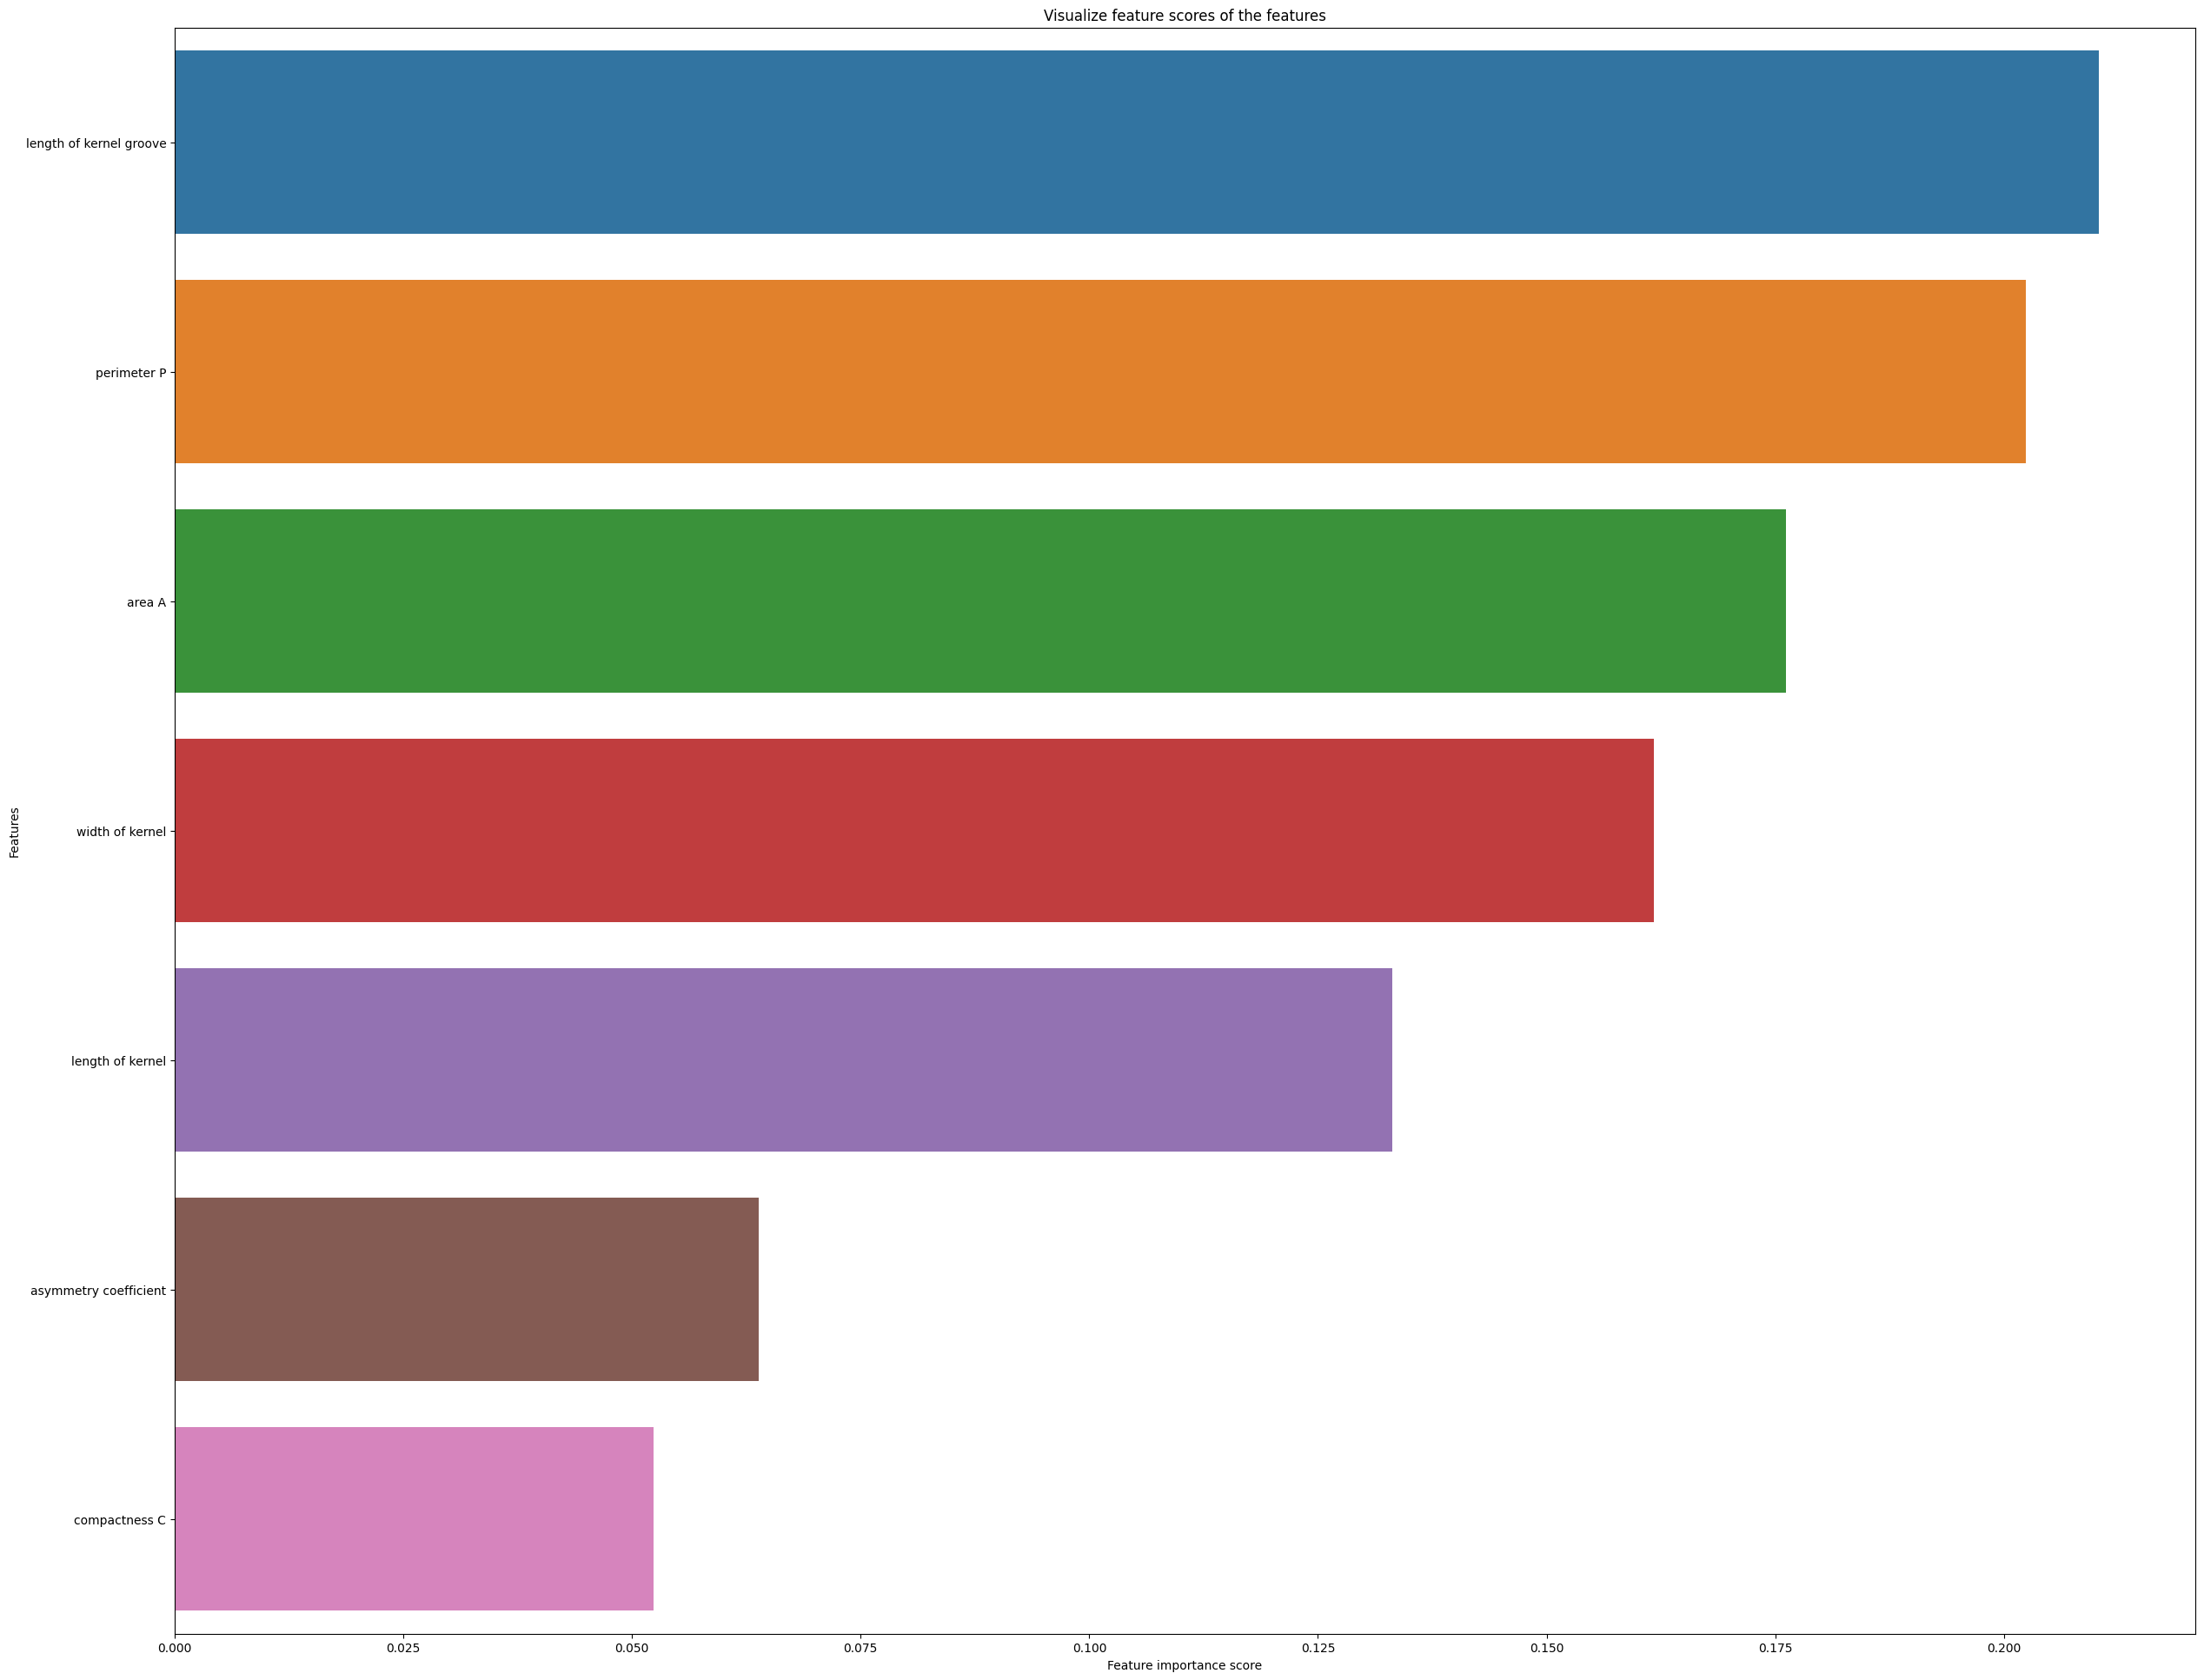

In [46]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [81]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', C= 0.075, max_iter= 50, solver= 'lbfgs')

clf2 = SVC(C= 3, gamma= 'scale', kernel= 'linear')

clf3 = RandomForestClassifier( max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)

ensemble_clf = VotingClassifier(estimators=[('lr', clf1), ('svm',clf2), ('rf', clf2)], voting='hard')

ensemble_clf.fit(X_train, y_train)

print("Training\n")
rf_train_perf = evaluate_model(ensemble_clf, X_train, y_train)
print("Validation\n")
rf_val_perf = evaluate_model(ensemble_clf, X_valid, y_valid)
print("Testing\n")
rf_test_perf = evaluate_model(ensemble_clf, X_test, y_test)


Training

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        42
           2       0.98      0.98      0.98        41
           3       0.98      0.98      0.98        43

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126

Validation

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.94      1.00      0.97        16
           3       0.92      1.00      0.96        11

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

Testing

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.92      1.00      0.96        11
           3       0.93      0.88      0.90 